# Part 2: Northwind Employee Performance Report

Umesh Rao & John Rollman & Yi Ren

This report is to summarize employee performance from Northwind SQLite dataset, which contains schematic information for managing small business ERP. For our report, we mainly focused on the Orders, Order Details, Categories, Products and Employees tables to evalulate employee's performance from 1996 to 1998. 

### Load Required Modules

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get Data From Northwind SQLite Dataset

Connect to database and use single command to pull from Orders, Order Details, Categories, Products and Employees tables.

In [2]:
# Connect to database
con = sqlite3.connect('northwind.sqlite')
cursor = con.cursor()

In [3]:
# SQL pull
sql_query = '''
        SELECT
        emp.EmployeeID,
        emp.LastName || ', '||emp.FirstName as full_name,
        emp.title,
        ord.OrderID,
        ord.CustomerID,
        cust.CompanyName,
        cust.Country,
        ord.OrderDate,
        ord2.ProductID,
        ord2.UnitPrice as order_price,
        ord2.Quantity as order_quant,
        ord2.Discount as order_disc,
        (ord2.UnitPrice*ord2.Quantity) * (1-ord2.Discount) as total_sale_revenue,
        prod.ProductName,
        cat.CategoryName
        
        FROM Orders ord
        inner join Employees emp on ord.EmployeeID=emp.EmployeeID
        left join Customers cust on ord.CustomerID=cust.CustomerID
        left join 'Order Details' ord2 on ord.OrderID=ord2.OrderID
        left join Products prod on ord2.ProductID=prod.ProductID
        left join Categories cat on prod.CategoryID=cat.CategoryID
        
        WHERE 1=1
        
        group by
        emp.EmployeeID,
        emp.LastName || ', '||emp.FirstName,
        emp.title,
        ord.OrderID,
        ord.CustomerID,
        cust.CompanyName,
        cust.Country,
        ord.OrderDate,
        ord2.ProductID,
        ord2.UnitPrice,
        ord2.Quantity,
        ord2.Discount,
        (ord2.UnitPrice*ord2.Quantity) * (1-ord2.Discount),
        prod.ProductName,
        cat.CategoryName
        ;
        '''

In [4]:
# Show the first few rows
df = pd.read_sql(sql_query, con).rename(columns=str.lower)
df.head()

,employeeid,full_name,title,orderid,customerid,companyname,country,orderdate,productid,order_price,order_quant,order_disc,total_sale_revenue,productname,categoryname
0,5,"Buchanan, Steven",Sales Manager,10248,VINET,Vins et alcools Chevalier,France,1996-07-04 00:00:00.000,11,14.0,12,0.0,168.0,Queso Cabrales,Dairy Products
1,5,"Buchanan, Steven",Sales Manager,10248,VINET,Vins et alcools Chevalier,France,1996-07-04 00:00:00.000,42,9.8,10,0.0,98.0,Singaporean Hokkien Fried Mee,Grains/Cereals
2,5,"Buchanan, Steven",Sales Manager,10248,VINET,Vins et alcools Chevalier,France,1996-07-04 00:00:00.000,72,34.8,5,0.0,174.0,Mozzarella di Giovanni,Dairy Products
3,6,"Suyama, Michael",Sales Representative,10249,TOMSP,Toms SpezialitÃ¤ten,Germany,1996-07-05 00:00:00.000,14,18.6,9,0.0,167.4,Tofu,Produce
4,6,"Suyama, Michael",Sales Representative,10249,TOMSP,Toms SpezialitÃ¤ten,Germany,1996-07-05 00:00:00.000,51,42.4,40,0.0,1696.0,Manjimup Dried Apples,Produce


### Performance Analysis
We performed summary statsitics of sales by individual and computed several plots to visual the employee performance by comparing with others as a team. The bar plot provided the total sale comparison for each employee. Box plot showed the variation and distribution of data based on a five number summary in details. We could obtained the sales trend in the team across quarter through line plot. Broken out by country and product category provide more information about the transaction.

#### Summary Statistics of Sales by Individual
Group the full name and titles of employees then obtain the summary statistics. Drop all the NA and sort the value by the sum of sales.

In [5]:
indPerf = df.groupby(by=['full_name','title'])['total_sale_revenue'].agg(['count','sum','mean','std','min','max','median']).dropna(subset=['std']).sort_values(by=['sum'], ascending=False).reset_index()
indPerf

,full_name,title,count,sum,mean,std,min,max,median
0,"Peacock, Margaret",Sales Representative,420,232890.8460,554.502014,835.402851,7.30,10540.00,349.375
1,"Leverling, Janet",Sales Representative,321,202812.8430,631.815710,1015.899688,8.64,9903.20,347.200
2,"Davolio, Nancy",Sales Representative,345,192107.6045,556.833636,1046.678504,8.50,15810.00,306.375
3,"Fuller, Andrew","Vice President, Sales",241,166537.7550,691.028029,1268.353358,4.80,15019.50,399.000
4,"Callahan, Laura",Inside Sales Coordinator,260,126862.2775,487.931837,481.205577,13.50,2700.00,311.340
5,"King, Robert",Sales Representative,176,124568.2350,707.774063,1190.981650,16.00,8432.00,366.400
6,"Dodsworth, Anne",Sales Representative,107,77308.0665,722.505294,1317.878865,12.50,10540.00,323.000
7,"Suyama, Michael",Sales Representative,168,73913.1295,439.959104,534.870300,16.00,4456.44,285.750
8,"Buchanan, Steven",Sales Manager,117,68792.2825,587.968226,845.989352,20.25,6324.00,336.000


From 1996 through 1998, Margaret Peacock maintained the highest total sale revenue while Anne Dodsworth had the highest average sale amount. As vice president and inside sales coordinator, Andrew Fuller and Laura Callahan are not only responsible for some management duties, but also contribute significantly in sales. Andrew Fuller has the highest median of total sale revenue.

#### Total Sales by Individual

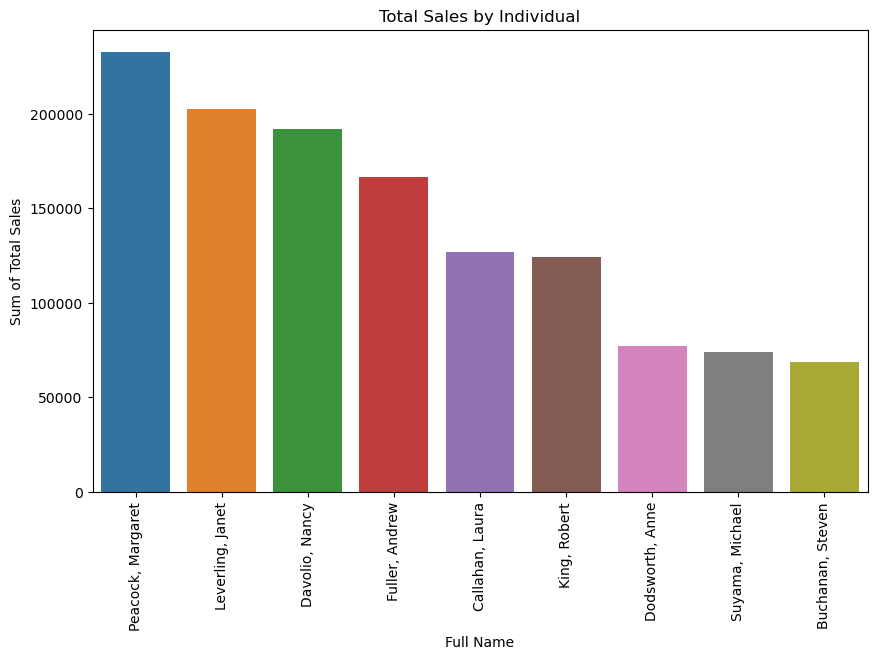

In [6]:
fig, ax=plt.subplots(figsize=(10,6))
sns.barplot(data=indPerf, x="full_name", y="sum", errorbar=None, ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set(title='Total Sales by Individual', xlabel='Full Name', ylabel='Sum of Total Sales')
plt.show()

The plot above, again, shows the total sale revenue generated across the 2 years by individual employee. Margaret Peacock holds the first position of the total sales in the company, who contributed 232890. While Steven Buchanan is the last place, who contributed 68792 in total.

#### Box Plot of Order Sales

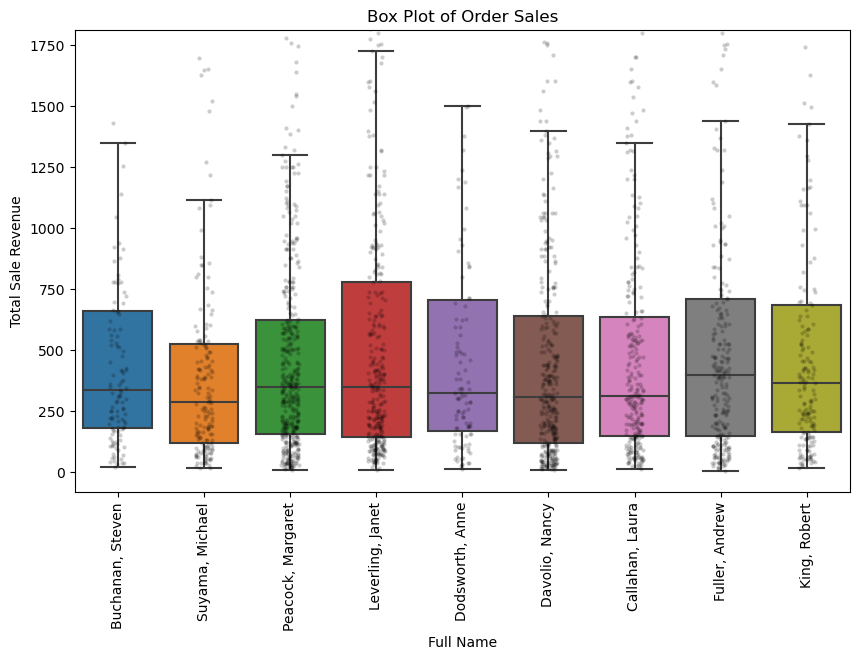

In [7]:
fig, ax=plt.subplots(figsize=(10,6))
sns.boxplot(x='full_name', y='total_sale_revenue', data=df, showfliers = False, ax=ax)
ylims=ax.get_ylim()
sns.stripplot(x = "full_name", y = "total_sale_revenue", color = 'black', size = 3, alpha = 0.2, data = df)
ax.set(ylim=ylims, title='Box Plot of Order Sales', xlabel='Full Name', ylabel='Total Sale Revenue')
ax.tick_params(axis='x', labelrotation=90)
fig.show()

The box plot above shows the distribution of individual sale amounts by each employee. Janet Leverling, shown in red has the higehst range of sale values. While Michael Suyama has the lowest range of sale values. Andrew Fuller has the highest median of total sale revenue in the company. 

#### Sales Over Time by Individual

In [8]:
df['orderdate_f'] = pd.to_datetime(df['orderdate']).dt.date
df['orderdate_yr'] = pd.to_datetime(df['orderdate_f']).dt.year
df['orderdate_qtrNum'] = pd.to_datetime(df['orderdate_f']).dt.quarter
df['orderdate_qtr'] = pd.PeriodIndex(df.orderdate_f, freq='Q').astype(str)
yearPerf=df.groupby(by=['full_name','title','orderdate_yr','orderdate_qtr'])['total_sale_revenue'].agg(['mean','sum']).sort_values(by=['full_name','orderdate_qtr']).reset_index()

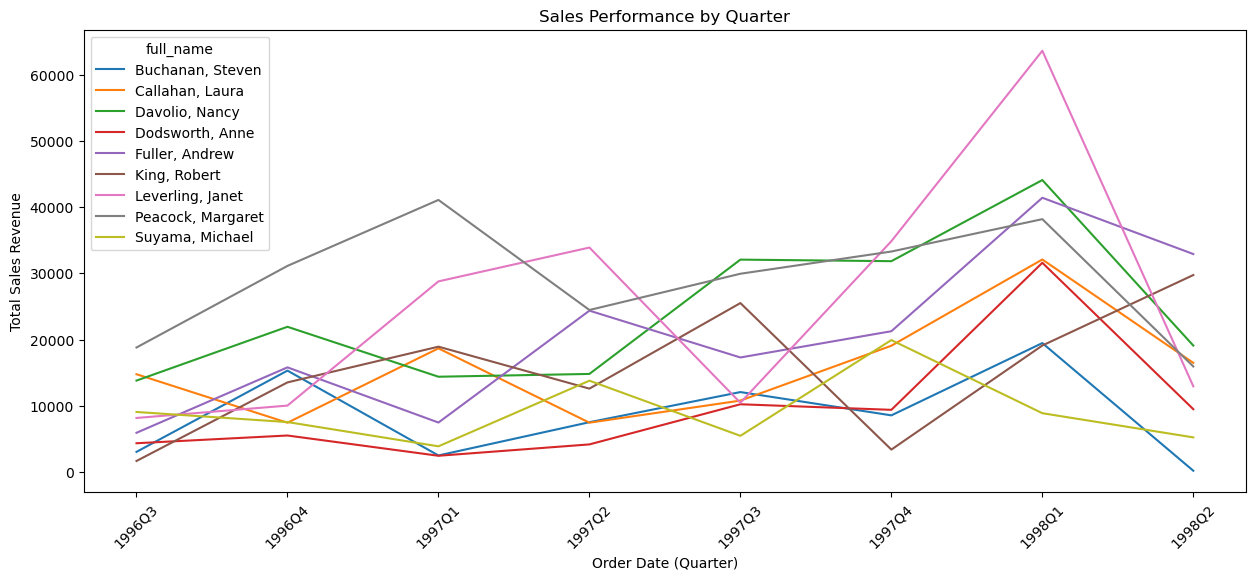

In [9]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x = "orderdate_qtr", y = "sum", data = yearPerf, hue = 'full_name', errorbar=None, ax=ax)
ax.tick_params(axis='x', labelrotation=45)
plt.title('Sales Performance by Quarter')
plt.ylabel('Total Sales Revenue')
plt.xlabel('Order Date (Quarter)')
plt.show()

The plot above shows total sales revenue by year-quarter for each employee. There was a spike in sales revenue in Q1 of 1998 with everyon having a peak. Janet Leverling had the highest peak in that quarter.

#### Individual Total Sales Broken out by Country

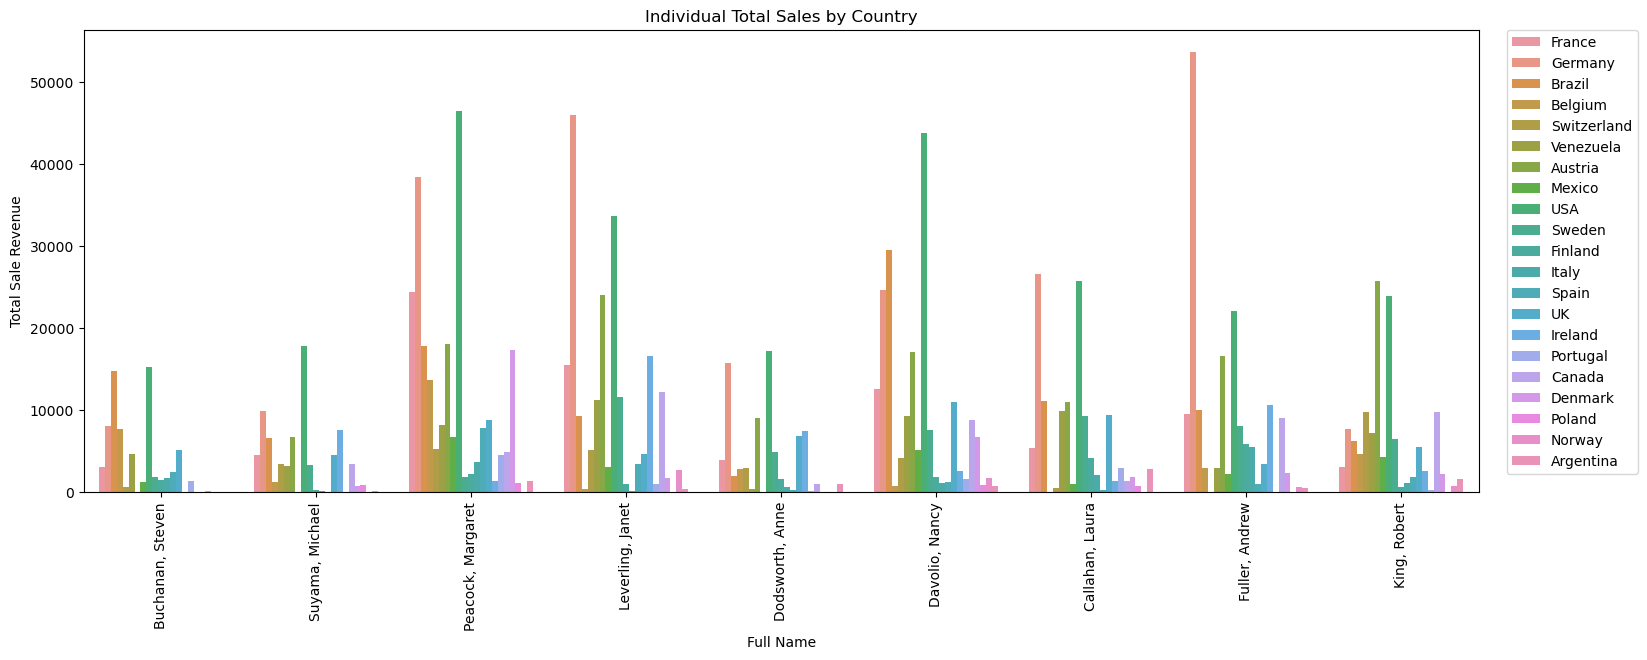

In [10]:
fig, ax=plt.subplots(figsize=(18,6))
sns.barplot(data=df, x="full_name", y="total_sale_revenue", hue="country",estimator='sum', errorbar=None, ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set(title='Individual Total Sales by Country', xlabel='Full Name', ylabel='Total Sale Revenue')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.show()

The above plot shows the breakout of sales by customer country for each employee. A lot of sales came from the US and Germany. Margaret Peacock led the US sales and Andrew Fuller led the German sales.

#### Individual Sales by Product Category

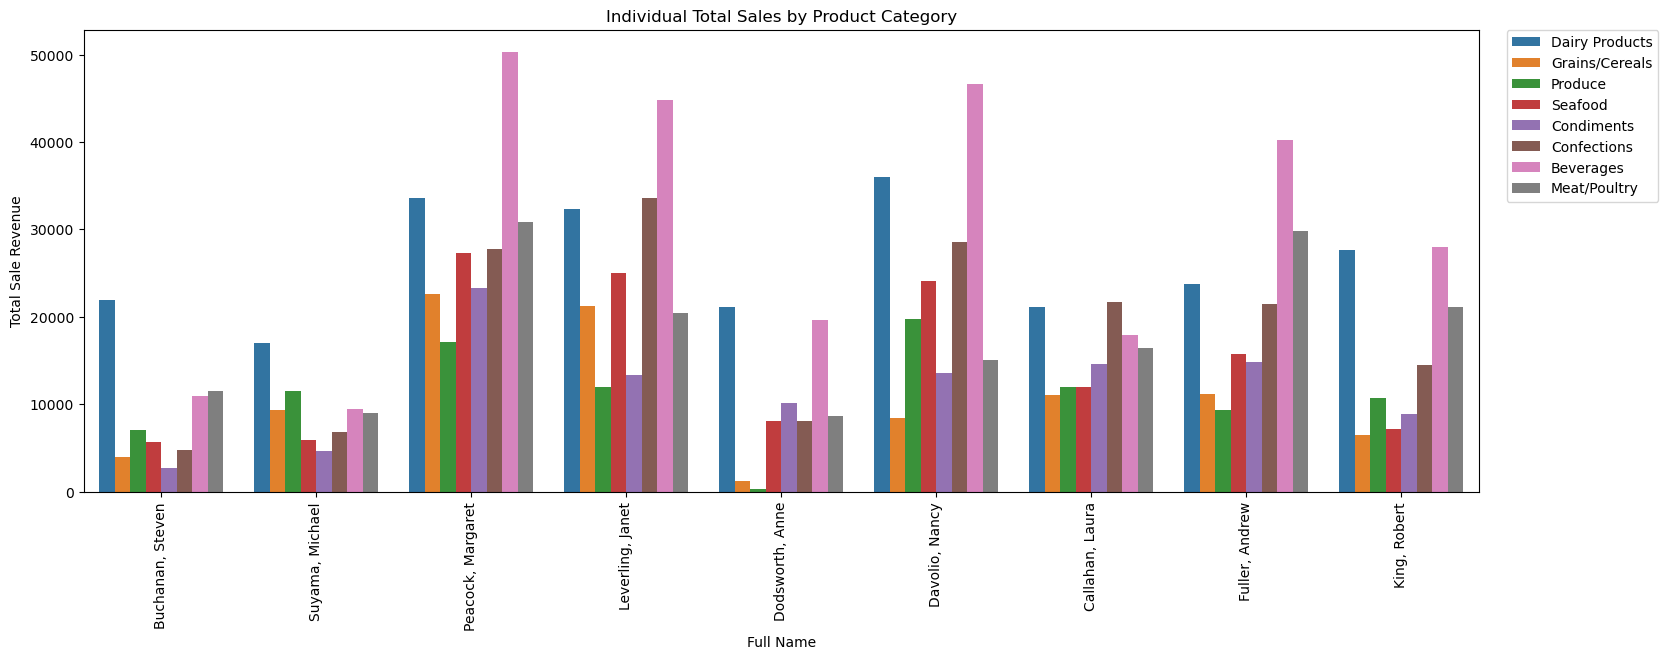

In [11]:
fig, ax=plt.subplots(figsize=(18,6))
sns.barplot(data=df, x="full_name", y="total_sale_revenue", hue="categoryname", estimator='sum', errorbar=None, ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set(title='Individual Total Sales by Product Category', xlabel='Full Name', ylabel='Total Sale Revenue')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.show()

The above plot shows the total sale revenue for each employee broken out by product category. Beverages made the a large contribution to several employees sales. Margret Peacock maintains high sales across all categories comparitively. 

### Individual Performance Report Generator

To create more standardized way of employee reporting. We have create a function call of some basic summaries to help analyze individual sales performance by employee. We can dig into more details about individual sales employees' performance by looking at their sales trend across quarter through line plot. By looking at the pie plot of the sales in categories, we can obtain information about the strength of each sales employees in certain categories. By the information from the bar plot of the sales in ship country, we can visual the customers' location among all the sales. 

#### Create Sales Report Function

+ Line Plot (represent the sales trend by quarter)

In [58]:
# Create function to generate line report
def line_report(df,lastName_firstName):
    sales = df[df['full_name'] == lastName_firstName]
    report = sales \
        .groupby(['orderdate_yr', 'orderdate_qtrNum']) \
        .agg(mean_Sales = ('total_sale_revenue', 'mean'))
    report.plot.line()
    plt.title(lastName_firstName + "'s " + 'Average Sales Report by Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Total Sale Revenue')
    plt.show()

In [59]:
# Create function to generate line report
def line_report2(df,lastName_firstName):
    sales = df[df['full_name'] == lastName_firstName]
    report = sales \
        .groupby(['orderdate_yr', 'orderdate_qtrNum']) \
        .agg(total_Sales = ('total_sale_revenue', 'sum'))
    report.plot.line()
    plt.title(lastName_firstName + "'s " + 'Total Sales Report by Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Total Sale Revenue')
    plt.show()

+ Pie Plot (represent the sales percentage by categories)

In [60]:
# Create function to generate pie report
def pie_report(df,lastName_firstName):
    sales = df[df['full_name'] == lastName_firstName]
    report = sales \
        .categoryname \
        .value_counts() 
    report.plot.pie()
    plt.title(lastName_firstName + "'s " + 'Sales Report by Categories')  
    plt.show()

+ Bar Plot (represent the sales by customer's location)

In [61]:
# Create function to generate bar report
def bar_report(df,lastName_firstName):
    sales = df[df['full_name'] == lastName_firstName]
    report = sales \
        .groupby(['country'])['total_sale_revenue'] \
        .sum() \
        .sort_values()
    report.plot.bar()
    plt.title(lastName_firstName + "'s " + "Sales Report by Country")  
    plt.ylabel('Total Sale Revenue')
    plt.show()

It is more efficient to generate individual sales report simply just call the name of employee via wrapped functions. 

In [62]:
# Wrap into one function call
def ind_report(df, name):
    line_report(df, name)
    line_report2(df, name)
    pie_report(df,name)
    bar_report(df,name)

Because of the limited space, we prefer not generate report for each employee. We only pick the top performer Margaret Peacock as an example to show how's the report look like. But the function are available to all the employees.

#### Sample Report: Margaret Peacock

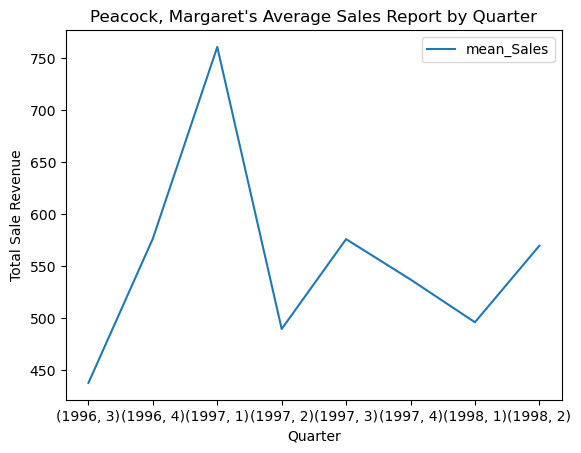

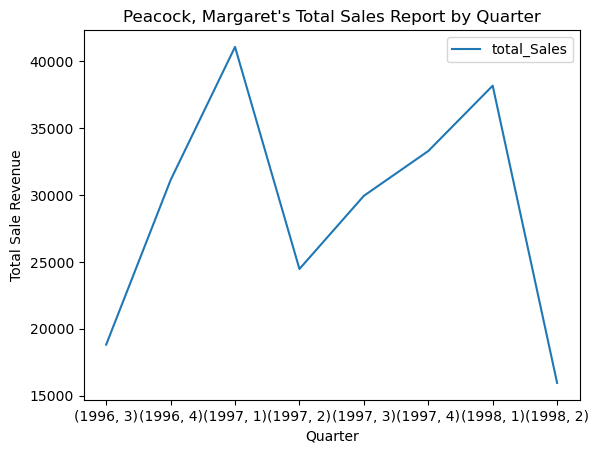

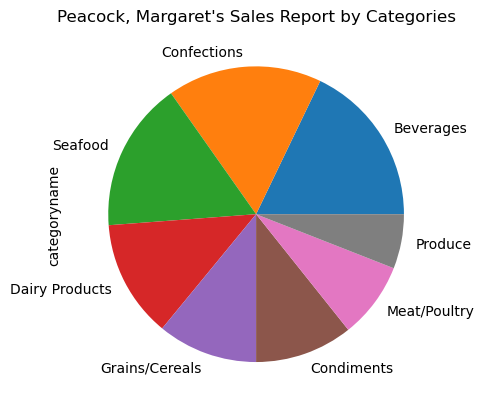

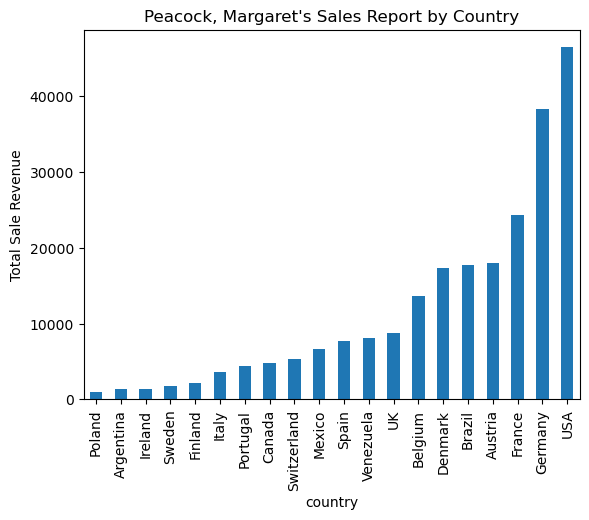

In [63]:
ind_report(df,'Peacock, Margaret')

The detailed report can be generated by each function call. From Margaret Peacock's sales report, we can obtain the more detailed informaion about each employee's performance visually. The biggest sale happened in 1997. Moreover, we observed a increasing trend in her sales plots. Beverage, Confections and Seafoods are the top 3 categories in her sales. Her major customers are US based following by Germany and France. 